In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [5]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [6]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [7]:
#Merge BB100 with Spotify Features
bb100_features = pd.merge(bb100, features, on='SongID', how='left')

In [8]:
#Sub Dataframe focusing on Genres
df_genre = bb100_features[['SongID', 'spotify_genre']]
df_genre

,SongID,spotify_genre
0,Don't Just Stand TherePatty Duke,['deep adult standards']
1,Don't Just Stand TherePatty Duke,['deep adult standards']
2,Don't Just Stand TherePatty Duke,['deep adult standards']
3,Don't Just Stand TherePatty Duke,['deep adult standards']
4,Don't Just Stand TherePatty Duke,['deep adult standards']
...,...,...
330456,God Is A WomanAriana Grande,"['dance pop', 'pop', 'post-teen pop']"
330457,I Wanna Get Next To YouRose Royce,"['classic soul', 'disco', 'funk', 'motown', 'post-disco', 'quiet storm', 'soul']"
330458,I Can't Stand ItEric Clapton And His Band,NaN
330459,Here I Am Come & Take MeAl Green,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']"


In [9]:
#Checking for NaNs
df_genre.isnull().sum()

SongID               0
spotify_genre    14586
dtype: int64

In [10]:
#Checking for '[]', empty cells, convert them to NaNs. 
df_genre['spotify_genre'].replace({"[]":np.nan}, inplace=True)
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SongID               0
spotify_genre    37651
dtype: int64

In [11]:
#Drop combined NaNs.
df_genre.dropna(subset=['spotify_genre'], inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
#Recheck to ensure no more NaNs. 
df_genre.isnull().sum()

SongID           0
spotify_genre    0
dtype: int64

In [13]:
#Quick View
df_genre

,SongID,spotify_genre
0,Don't Just Stand TherePatty Duke,['deep adult standards']
1,Don't Just Stand TherePatty Duke,['deep adult standards']
2,Don't Just Stand TherePatty Duke,['deep adult standards']
3,Don't Just Stand TherePatty Duke,['deep adult standards']
4,Don't Just Stand TherePatty Duke,['deep adult standards']
...,...,...
330453,Don't You CareThe Buckinghams,"['brill building pop', 'bubblegum pop', 'classic garage rock', 'folk rock', 'merseybeat']"
330454,KiddioBrook Benton,"['adult standards', 'brill building pop', 'motown', 'rhythm and blues', 'rock-and-roll', 'soul', 'southern soul']"
330456,God Is A WomanAriana Grande,"['dance pop', 'pop', 'post-teen pop']"
330457,I Wanna Get Next To YouRose Royce,"['classic soul', 'disco', 'funk', 'motown', 'post-disco', 'quiet storm', 'soul']"


In [15]:
#Converting 'spotify_genre' to a list and applying 'explode' method: 
Songs = df_genre.SongID
arr = df_genre['spotify_genre'].values
out = [i.replace('\'', '').replace('[','').replace(']','').replace('"','').split(", ") 
       for i in arr]
Genres_Explode = pd.DataFrame({'SongID':Songs, 'Genres':out}).explode('Genres')
Genres_Explode

,SongID,Genres
0,Don't Just Stand TherePatty Duke,deep adult standards
1,Don't Just Stand TherePatty Duke,deep adult standards
2,Don't Just Stand TherePatty Duke,deep adult standards
3,Don't Just Stand TherePatty Duke,deep adult standards
4,Don't Just Stand TherePatty Duke,deep adult standards
...,...,...
330459,Here I Am Come & Take MeAl Green,memphis soul
330459,Here I Am Come & Take MeAl Green,quiet storm
330459,Here I Am Come & Take MeAl Green,soul
330459,Here I Am Come & Take MeAl Green,soul blues


In [19]:
#Group By Genres and Count
Genre_Count = Genres_Explode.groupby('Genres').count().sort_values(by='SongID', ascending=False).reset_index()
Genre_Count

,Genres,SongID
0,dance pop,48245
1,mellow gold,47410
2,soft rock,46859
3,pop,46327
4,rock,39336
...,...,...
1140,chicago punk,1
1141,chicago hardcore,1
1142,jazz pop,1
1143,champeta,1


In [109]:
pd.set_option('display.max_rows', None)
Genre_Count

,Genres,SongID
0,dance pop,48245
1,mellow gold,47410
2,soft rock,46859
3,pop,46327
4,rock,39336
5,adult standards,36223
6,pop rap,34019
7,album rock,29440
8,urban contemporary,28738
9,brill building pop,28736


In [140]:
Genre_Count.iloc[[0,4,10,11,12,18,24,42,59,118,137,173,236,283]]

,Genres,SongID
0,dance pop,48245
4,rock,39336
10,rap,28624
11,quiet storm,27274
12,soul,27225
18,country,25496
24,bubblegum pop,19973
42,lounge,9857
59,doo-wop,6535
118,jazz blues,1928


In [141]:
Count_List = Genre_Count['SongID'].iloc[[0,4,10,11,12,18,24,42,59,118,137,173,236,283]].tolist()
Count_List

[48245,
 39336,
 28624,
 27274,
 27225,
 25496,
 19973,
 9857,
 6535,
 1928,
 1377,
 878,
 453,
 290]

In [142]:
Genre_Labels = Genre_Count['Genres'].iloc[[283,236,173,137,118,59,42,24,18,12,11,10,4,0]].tolist()
Genre_Labels

['pixie',
 'hyphy',
 'metropopolis',
 'emo',
 'jazz blues',
 'doo-wop',
 'lounge',
 'bubblegum pop',
 'country',
 'soul',
 'quiet storm',
 'rap',
 'rock',
 'dance pop']

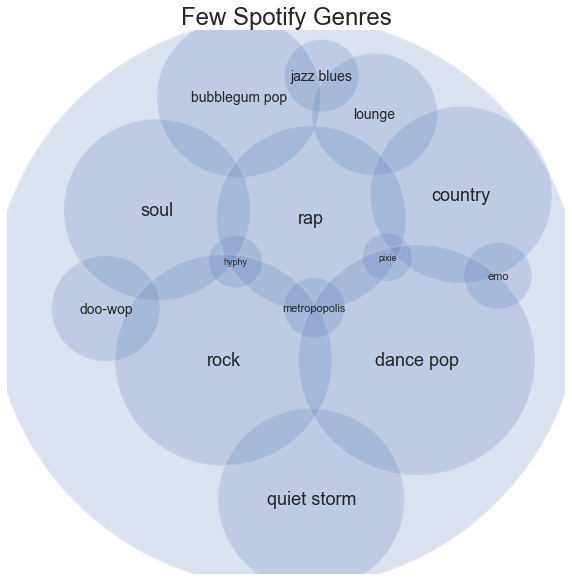

In [164]:
# import libraries
import circlify

# compute circle positions:
circles = circlify.circlify(
    Count_List, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1),
    show_enclosure=False)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Few Spotify Genres', fontsize=24)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = Genre_Labels

# List of font sizes
sizes = [9,9,11,11,14,14,14,14,18,18,18,18,18,18]

# print circles
for circle, label, size in zip(circles, labels, sizes):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r+0.06, alpha=0.2, linewidth=2))
    plt.annotate(
          label,
          (x,y), fontsize=size, 
          va='center',
          ha='center')

ax.add_patch(plt.Circle((0,0), 1.05, alpha=0.2, linewidth=3));

plt.savefig('Spotify_Bubbles_Burst.png');

#pprint(circles)
#circlify.bubbles(circles=circles)

[Circle(x=-0.870435674782115, y=-0.07960900446544382, r=0.12593143431114334, level=1, ex={'datum': 1}),
 Circle(x=-0.5932602144828303, y=-0.20452975474670634, r=0.17809394233191544, level=1, ex={'datum': 2}),
 Circle(x=-0.6622462609299455, y=0.1943039587412656, r=0.21811964249692284, level=1, ex={'datum': 3}),
 Circle(x=-0.3256418302158876, y=-0.5410461134698134, r=0.2518628686222867, level=1, ex={'datum': 4}),
 Circle(x=-0.3805741891177557, y=0.607065170177418, r=0.2815912476237659, level=1, ex={'datum': 5}),
 Circle(x=0.23468265461951263, y=-0.5384228903031626, r=0.3084677566391192, level=1, ex={'datum': 6}),
 Circle(x=0.23395509820613103, y=0.624427401857965, r=0.3331832574329519, level=1, ex={'datum': 7}),
 Circle(x=-0.11242478710544043, y=0.028395903858600517, r=0.3561878846638309, level=1, ex={'datum': 8}),
 Circle(x=0.6215574004918205, y=0.028395903858600517, r=0.37779430293343, level=1, ex={'datum': 9}),
 Circle(x=0, y=0, r=1, level=1, ex=None)]


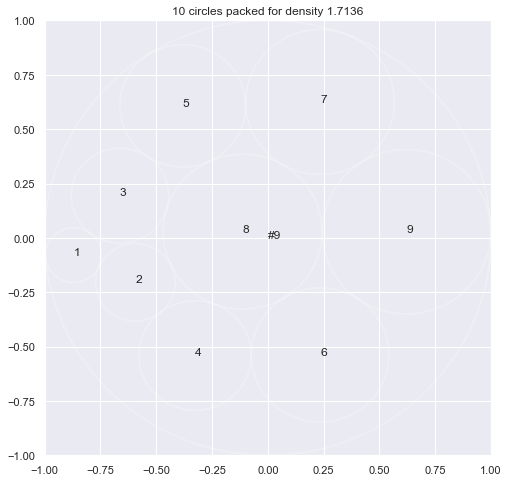

In [38]:
from pprint import pprint
import circlify
circles = circlify.circlify([9, 8, 7, 6, 5, 4, 3, 2, 1], show_enclosure=True, target_enclosure=circlify.Circle(x=0, y=0, r=1))
	# (necessary) data: A list of positive values sorted from largest to smallest
  	# (optional) target_enclosure: A target enclosure where the packed circles should fit (default to the unit circle (0, 0, 1))
  	# (optional) show_enclosure: A boolean indicating if the target enclosure should be appended to the output (default to False)
pprint(circles)
circlify.bubbles(circles=circles) # Graph of the packed circles